In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import FancyArrowPatch
import numpy as np
import IPython.display as ipd
import matplotlib.ticker as ticker


from helpers_adaptivefilters import *
from helpers_miscellaneous import *

# Basic Tools

## Simulated Data

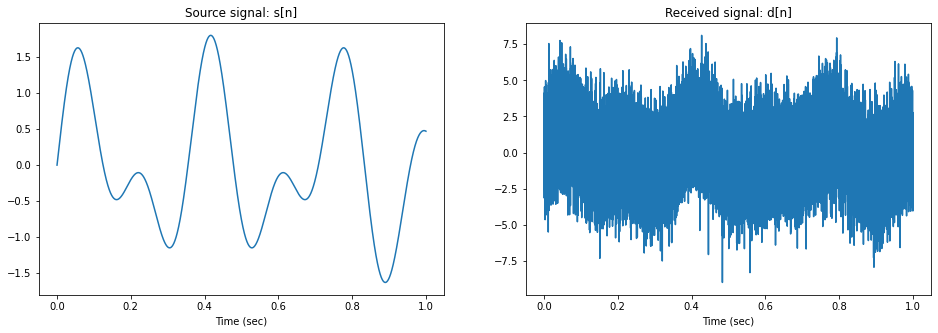

In [96]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))

### 1. LMS

Converged Point: 	 0.04077097505668934 sec
Max Misadjustment: 	 0.14019698055575175


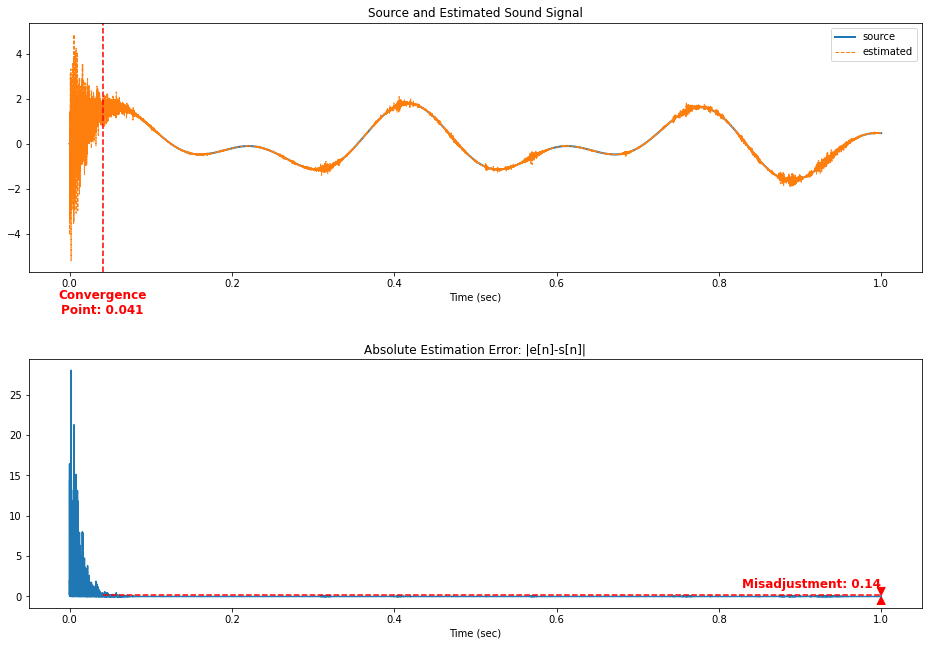

In [12]:
e = sb_lms(x, d, mu=0.001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/StandardLMS")

Ks
Not Converged!
Converged Point: 	 0.026258503401360545 sec
Max Misadjustment: 	 0.4623182219493959
Converged Point: 	 0.026281179138321994 sec
Max Misadjustment: 	 1.0162751120759426
Converged Point: 	 0.026258503401360545 sec
Max Misadjustment: 	 1.3217393971605889


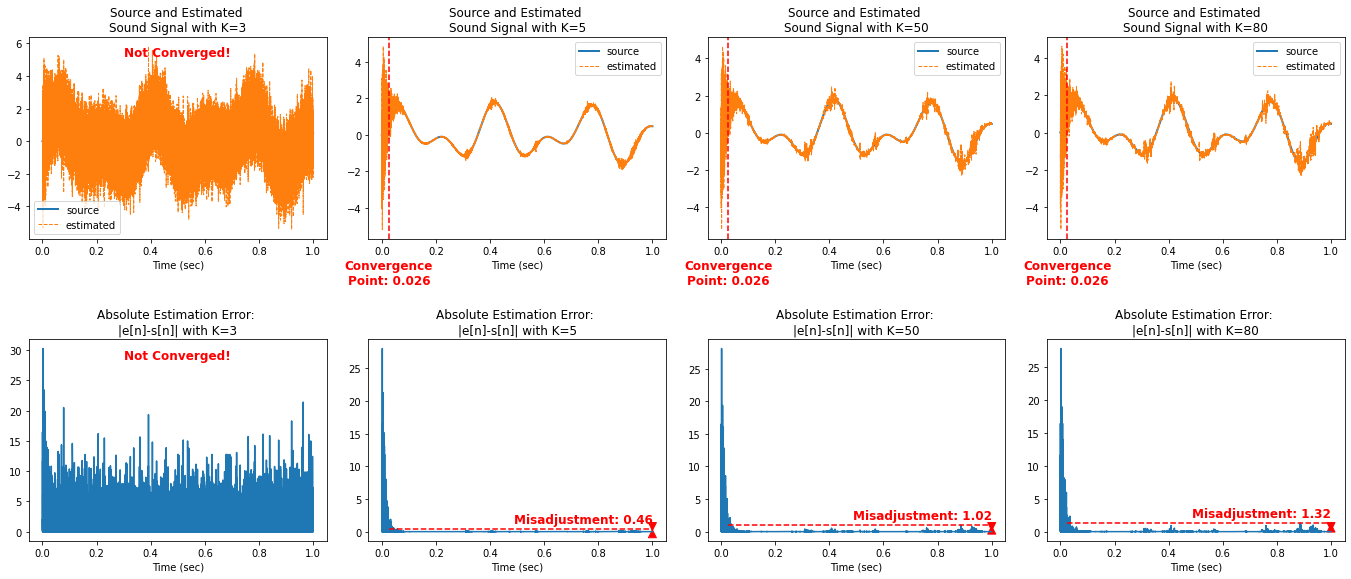

In [14]:
Ks = [3, 5, 50, 80]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, Ks=Ks, conv_div=10, save=False, savedfname="../figures/StandardLMSvsKs")

Converged Point: 	 0.37317460317460316 sec
Max Misadjustment: 	 0.041479237578629265
Converged Point: 	 0.041405895691609976 sec
Max Misadjustment: 	 0.23768799841704855
Converged Point: 	 0.007142857142857143 sec
Max Misadjustment: 	 3.0395454450385917
Converged Point: 	 0.0038775510204081634 sec
Max Misadjustment: 	 4.827431127419107


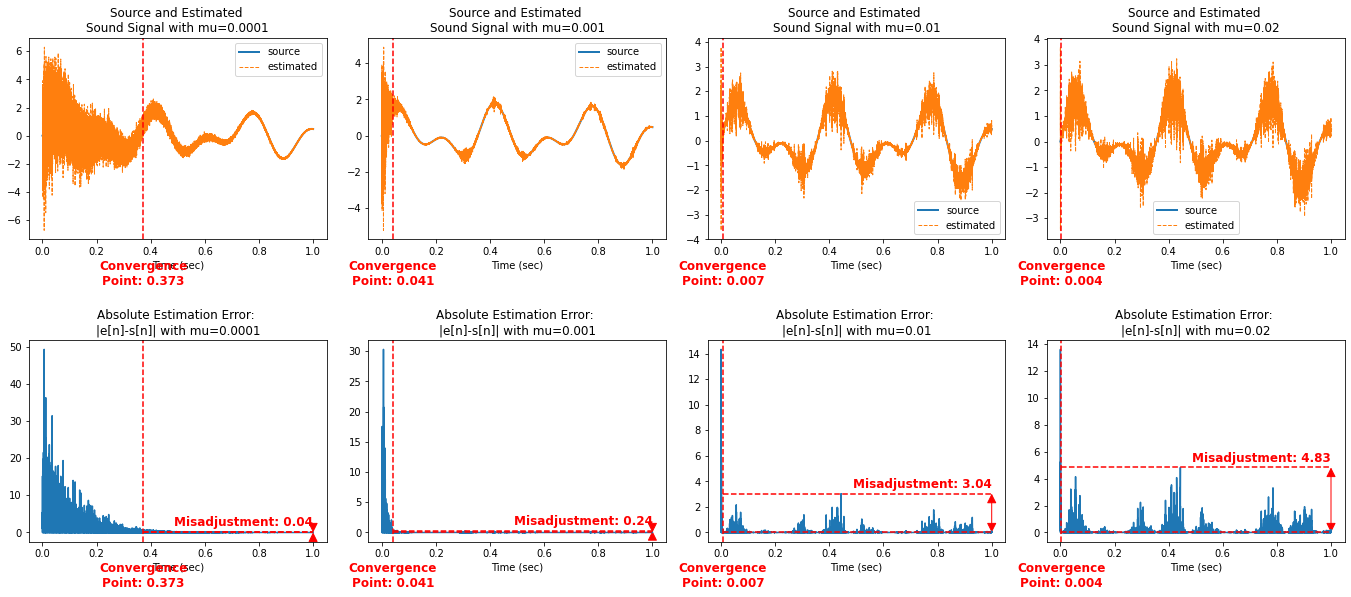

In [12]:
mus = [1e-4, 1e-3, 1e-2, 2e-2]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, mus=mus, conv_div=50, save=False, savedfname="../figures/StandardLMSvsmus")

Progress: 100%|█████████████████████████████████| 30/30 [00:41<00:00,  1.38s/it]


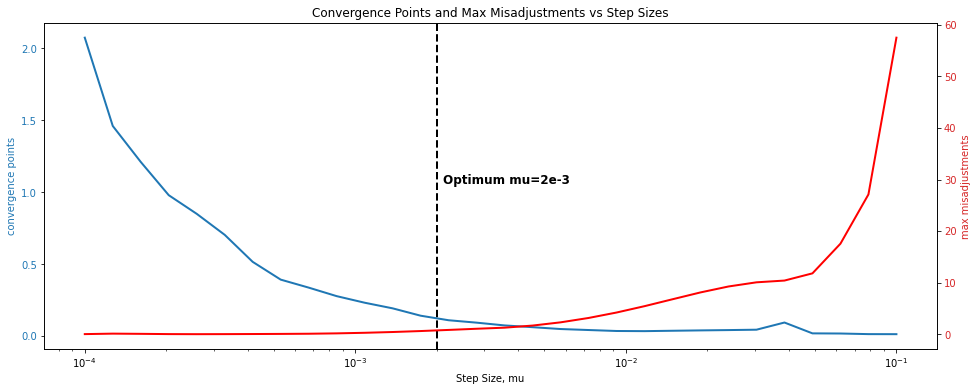

In [13]:
from helpers_miscellaneous import compare_with_params
mus = np.logspace(-4,-1,30)
T = 10
f = 3
fs = 8000
compare_with_params(f, T, fs, mus=mus, save=False, savedfname="../figures/ChoosingMu")

Progress: 100%|█████████████████████████████████| 45/45 [00:18<00:00,  2.46it/s]


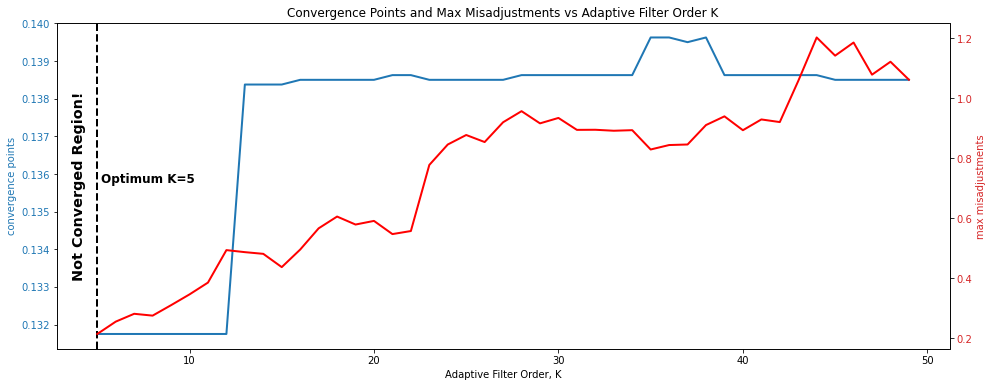

In [14]:
from helpers_miscellaneous import compare_with_params
Ks = np.arange(5,50,1)
T = 3
f = 3
fs = 8000
compare_with_params(f, T, fs, Ks=Ks, save=False, savedfname="../figures/ChoosingK")

### 2. Normalized LMS

Converged Point: 	 0.020476190476190478 sec
Max Misadjustment: 	 0.7681215955782015


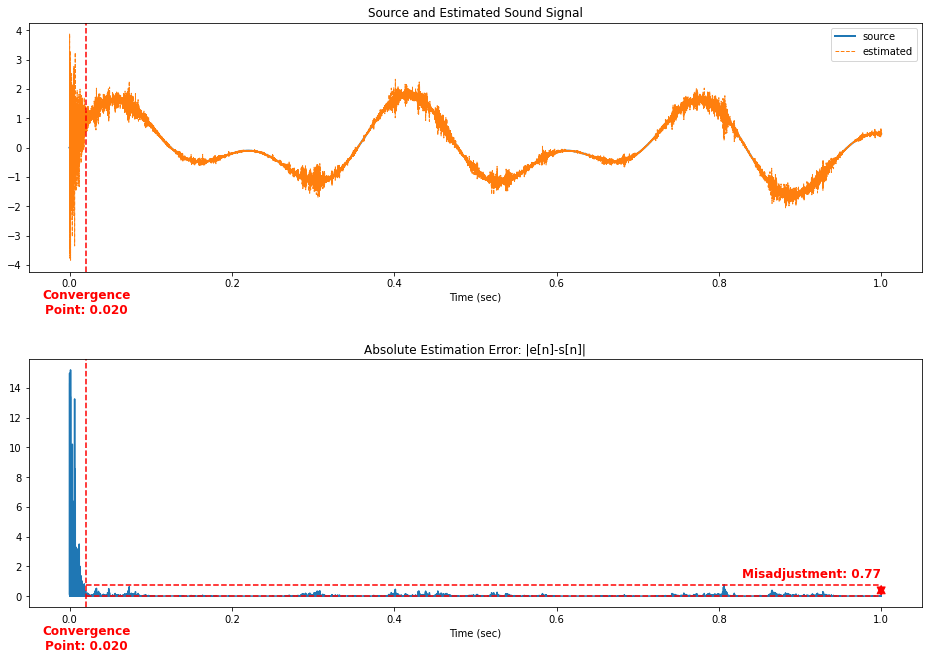

In [15]:
e = sb_lms(x, d, mu=0.012, K=5, normalized=True)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/NLMS")

Converged Point: 	 0.02290249433106576 sec
Converged Point: 	 0.017233560090702947 sec
Max Misadjustment: 	 0.775851819494876
Max Misadjustment: 	 0.5083996334262108


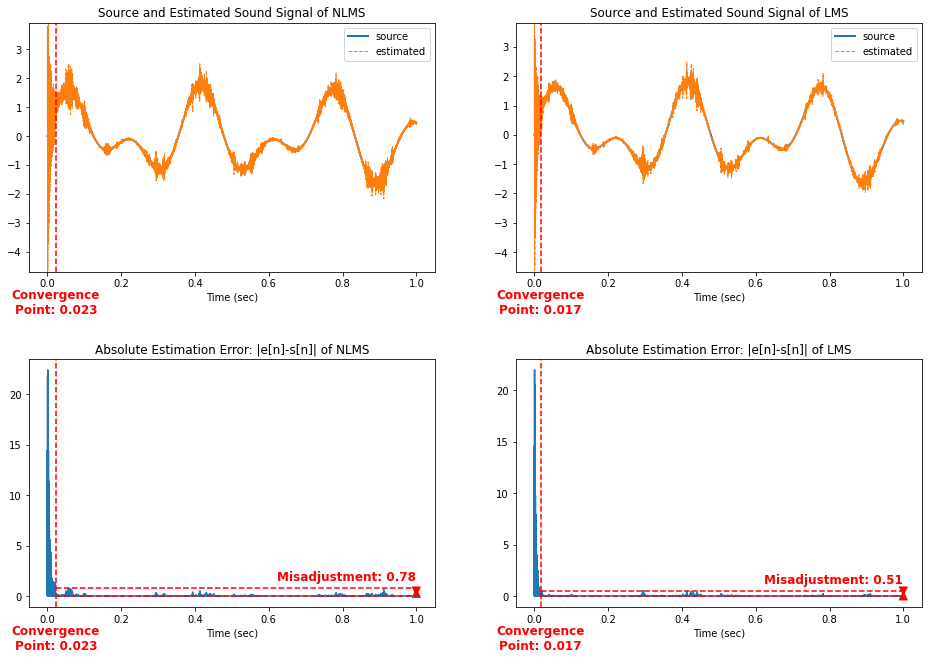

In [16]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_NLMS = sb_lms(x, d, mu=0.01, K=5, normalized=True)
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_NLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="NLMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonNLMSvsLMS")

### 3. Sign LMS

Converged Point: 	 0.11643990929705215 sec
Max Misadjustment: 	 0.7666682245922753


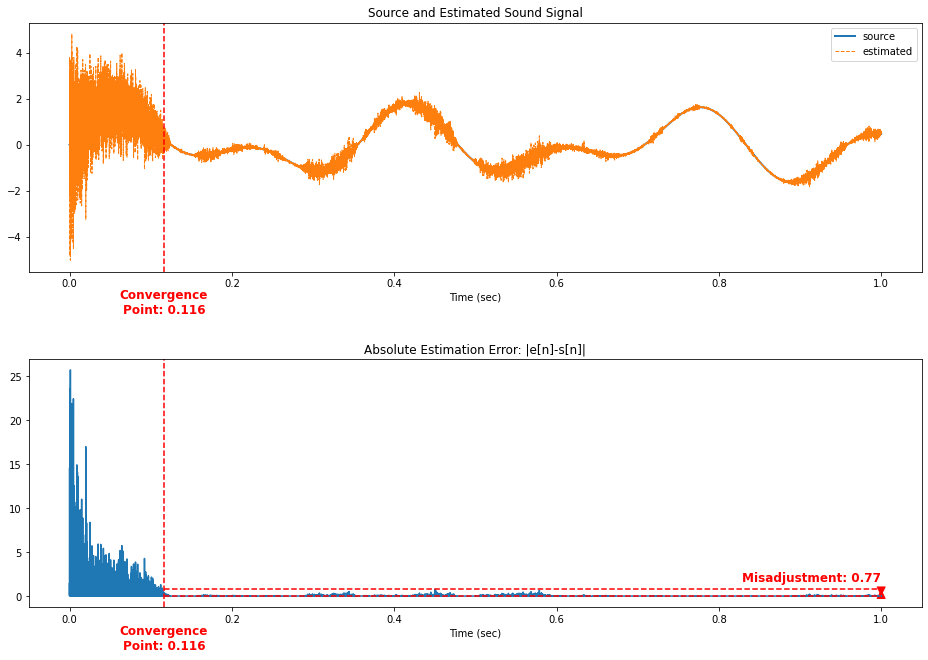

In [17]:
e = sb_lms(x, d, mu=0.001, K=5, type="sign-error")
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/SignerrorLMS")

Converged Point: 	 0.11140589569160998 sec
Converged Point: 	 0.023356009070294784 sec
Max Misadjustment: 	 0.6811677853943923
Max Misadjustment: 	 0.2514719976196554


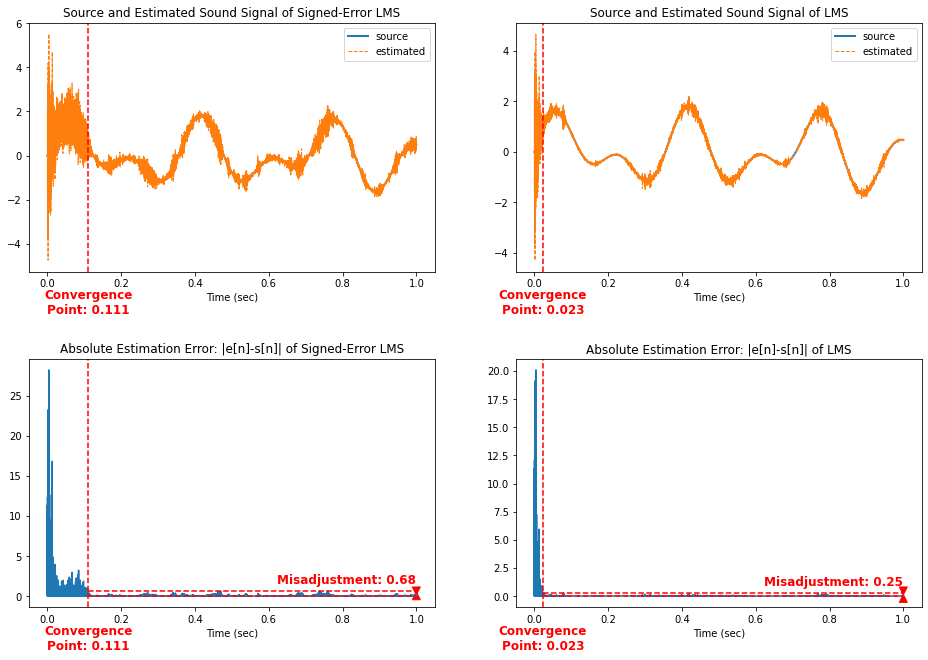

In [18]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SELMS = sb_lms(x, d, mu=0.002, K=5, normalized=False, type="sign-error")
e_LMS = sb_lms(x, d, mu=0.002, K=5, normalized=False)
plot2methods(t, e_SELMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Error LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSELMSvsLMS", ylim=False)

Converged Point: 	 0.05870748299319728 sec
Converged Point: 	 0.021882086167800453 sec
Max Misadjustment: 	 0.2487831607906437
Max Misadjustment: 	 0.5849403712921202


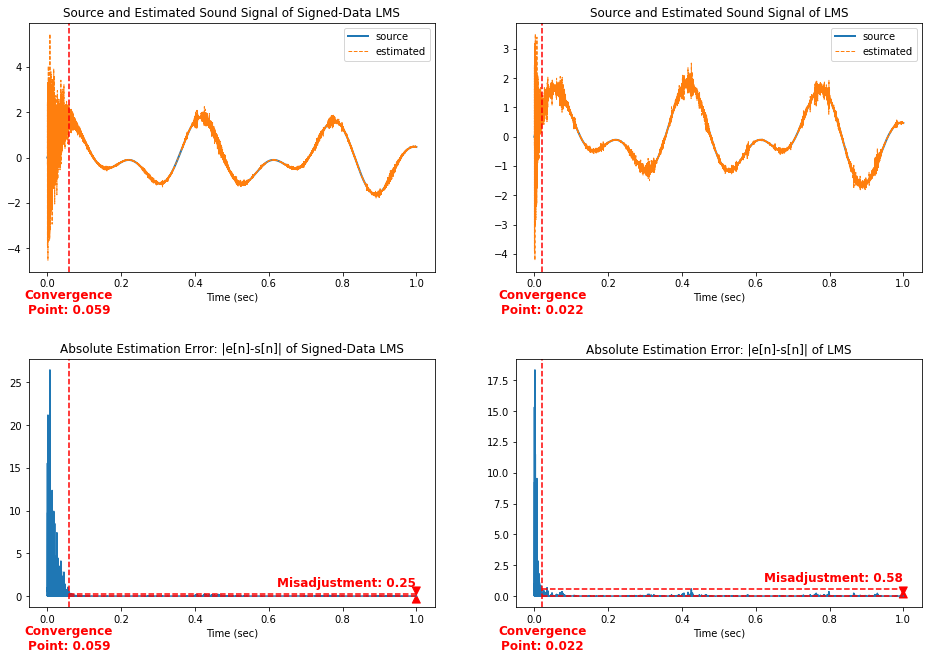

In [19]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SDLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-data")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SDLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Data LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSDLMSvsLMS", ylim=False)

Converged Point: 	 0.11709750566893425 sec
Converged Point: 	 0.020136054421768707 sec
Max Misadjustment: 	 0.23534454548277603
Max Misadjustment: 	 0.5676260627980959


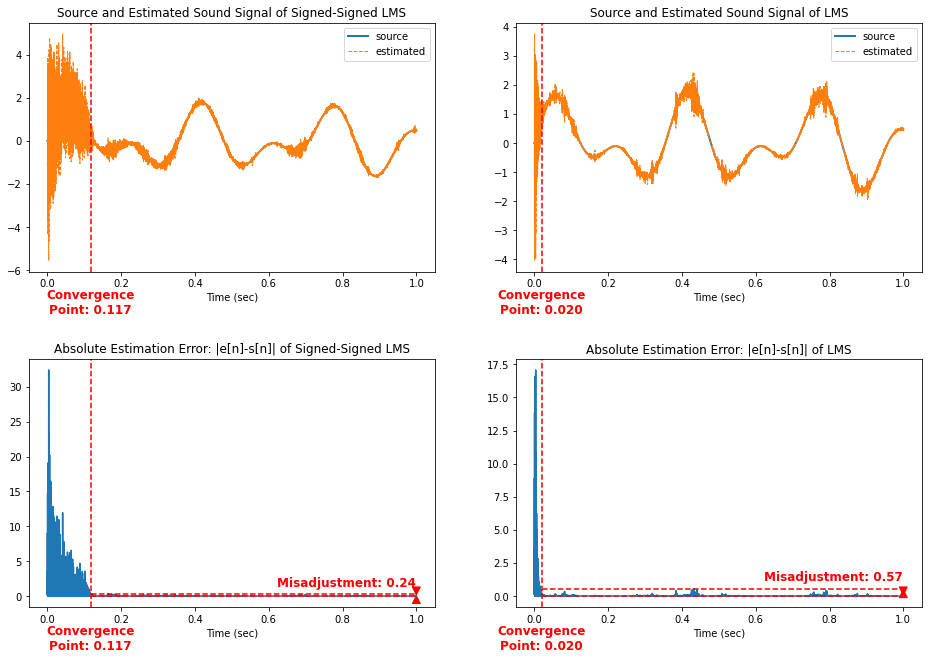

In [20]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSSLMSvsLMS", ylim=False)

Converged Point: 	 0.15047619047619049 sec
Converged Point: 	 0.020861678004535148 sec
Max Misadjustment: 	 0.3011202739796779
Max Misadjustment: 	 0.6153726342759017


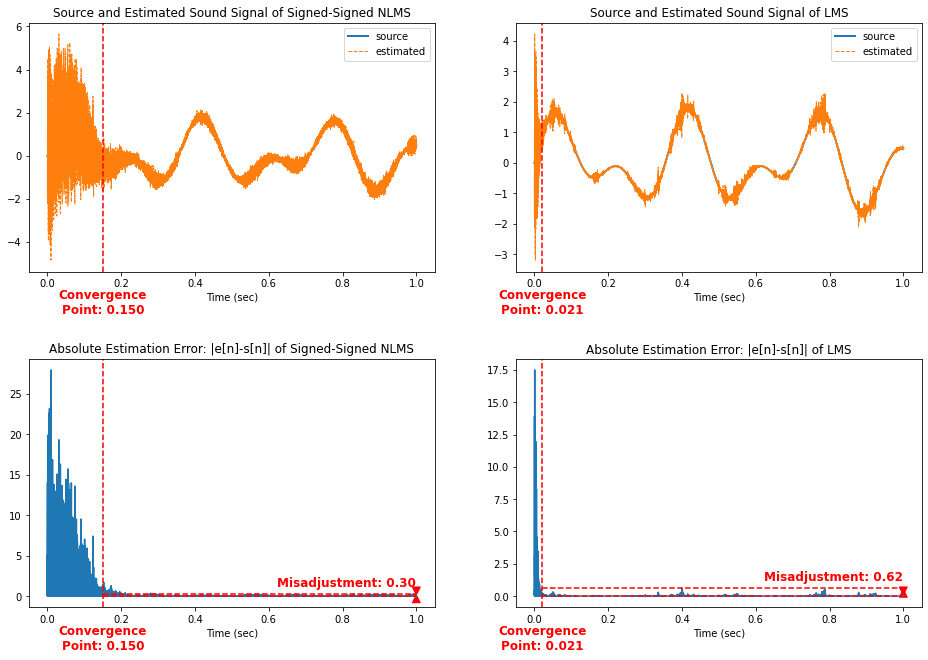

In [21]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSNLMS = sb_lms(x, d, mu=0.002, K=5, normalized=True, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSNLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed NLMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSSNLMSvsLMS", ylim=False)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 80887.31it/s]


Converged Point: 	 0.021859410430839003 sec
Converged Point: 	 0.018095238095238095 sec
Max Misadjustment: 	 0.5496750915307426
Max Misadjustment: 	 0.6892557681718382


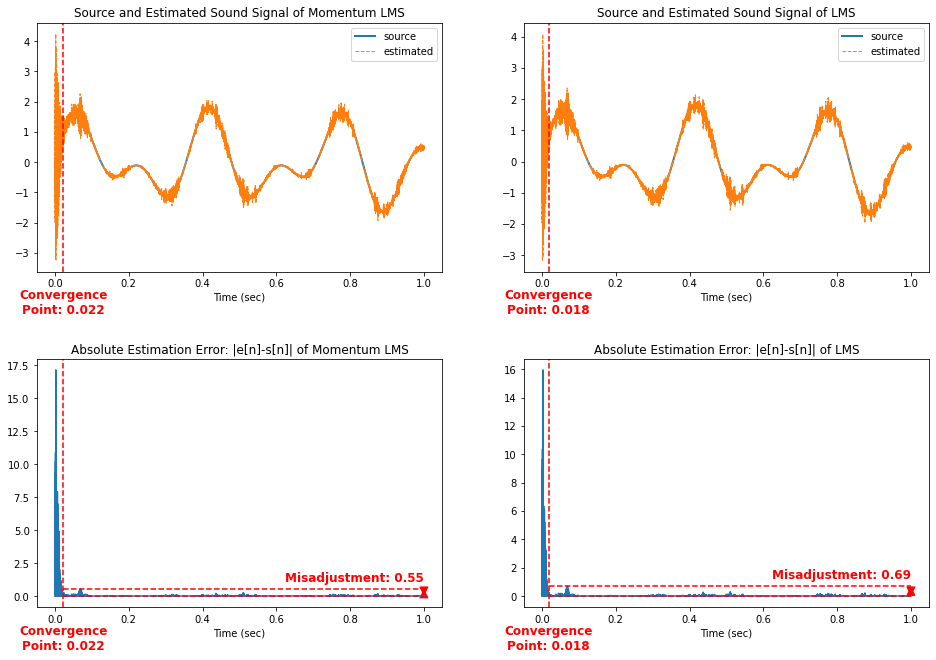

In [22]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_momentum = sb_lms(x, d, mu=0.002, K=5, type="momentum", beta=0.01)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_momentum, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Momentum LMS", method_name2="LMS", save=False, savedfname="../figures/MomentumLMSvsLMS", ylim=False)


Converged Point: 	 0.03147392290249433 sec
Converged Point: 	 0.021020408163265305 sec
Max Misadjustment: 	 1.9790318893949996
Max Misadjustment: 	 0.6755215059327839


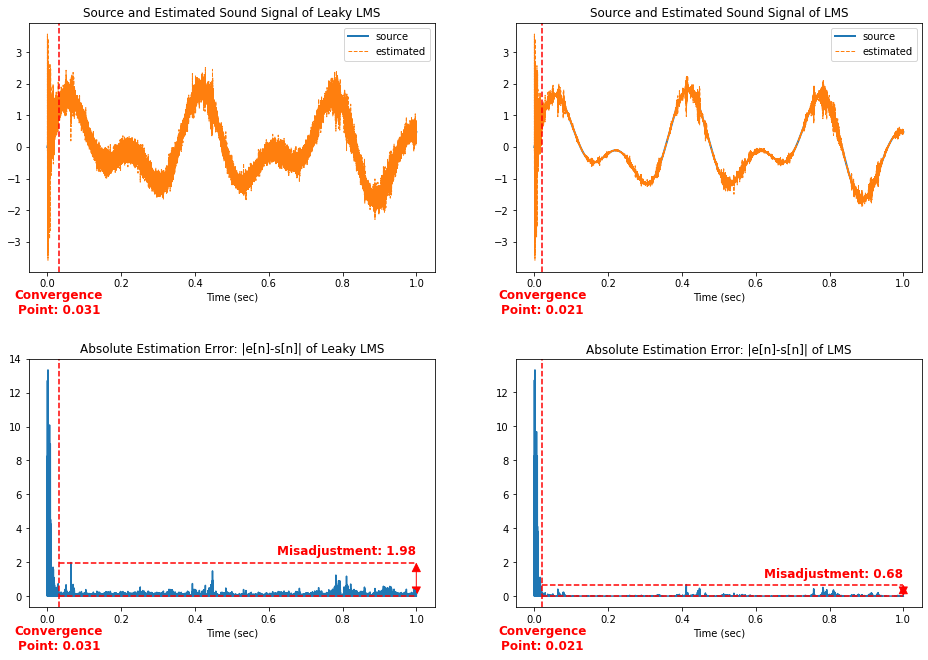

In [23]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_LLMS = sb_lms(x, d, mu=0.0025, K=5, a=0.1)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_LLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Leaky LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonLLMSvsLMS", ylim=False)


Converged Point: 	 0.002403628117913832 sec
Converged Point: 	 0.019523809523809523 sec
Max Misadjustment: 	 0.0773530269819883
Max Misadjustment: 	 0.6192005075633243


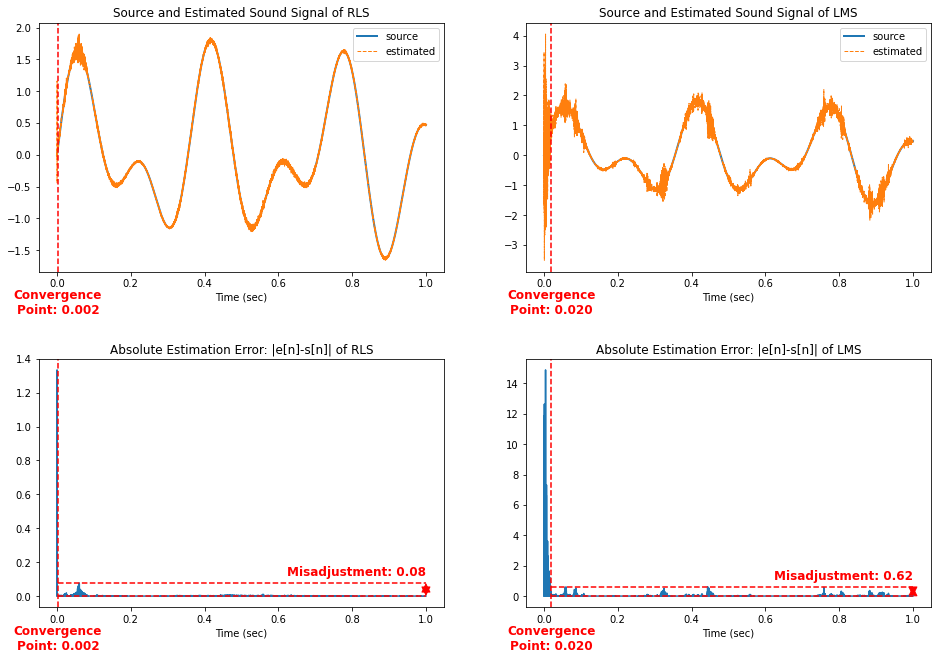

In [24]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_RLS = rls(x, d, mu=1., eps=0.001, K=5)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_RLS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="RLS", method_name2="LMS", save=False, savedfname="../figures/ComparisonRLSvsLMS", ylim=False)

Converged Point: 	 0.11628117913832199 sec
Max Misadjustment: 	 0.19980366198679667
Converged Point: 	 0.022879818594104307 sec
Max Misadjustment: 	 4.002085856979928


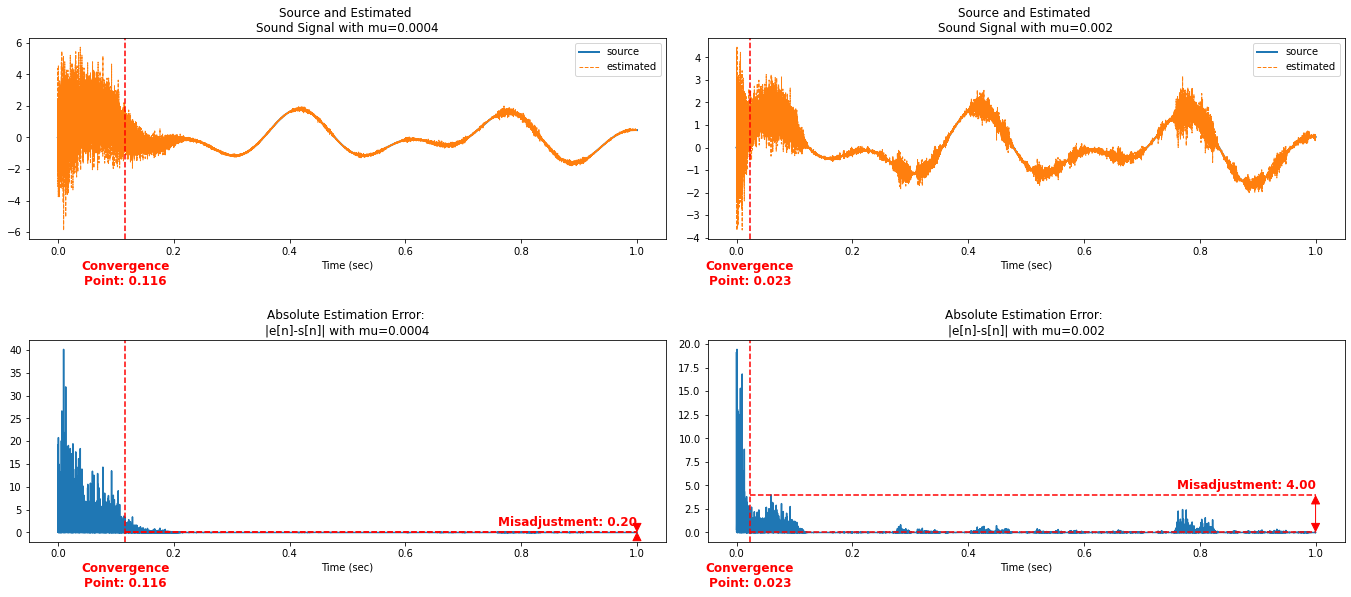

In [25]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.002]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-error", mus=mus, conv_div=10)

Converged Point: 	 0.043741496598639455 sec
Max Misadjustment: 	 0.24074969993976547
Converged Point: 	 0.019773242630385487 sec
Max Misadjustment: 	 0.5387798233329998


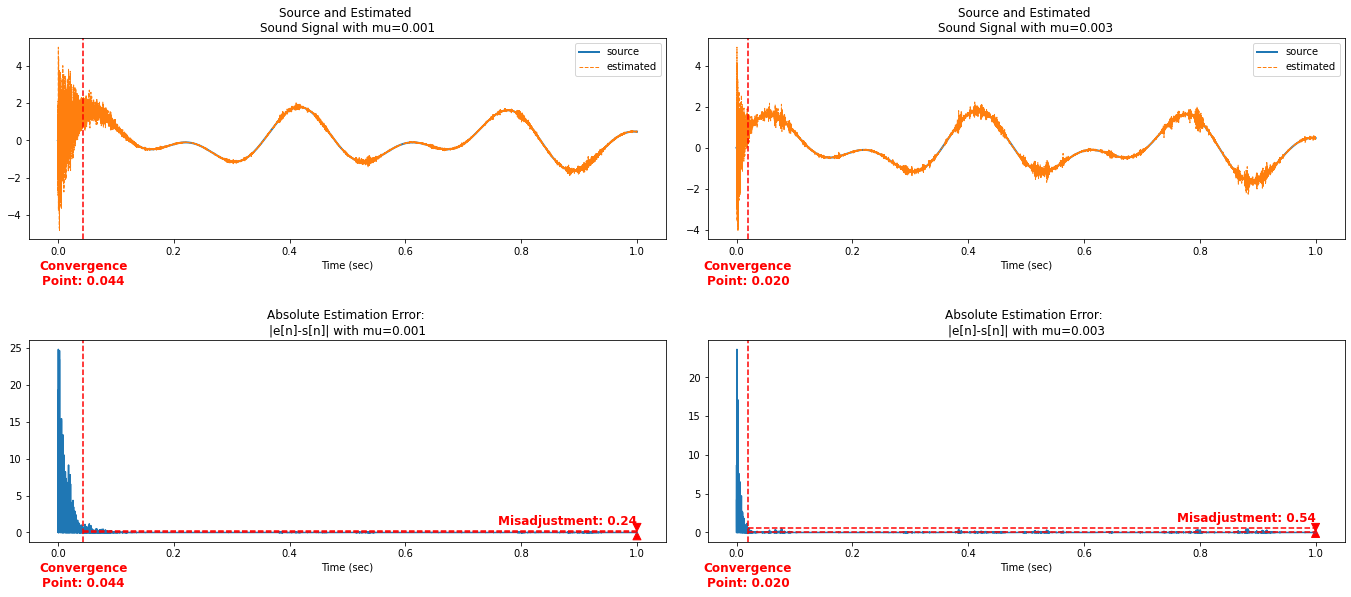

In [26]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.001, 0.003]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-data", mus=mus, conv_div=30)

Converged Point: 	 0.15700680272108844 sec
Max Misadjustment: 	 0.09653567794047482
Converged Point: 	 0.10854875283446712 sec
Max Misadjustment: 	 0.6248344009759516


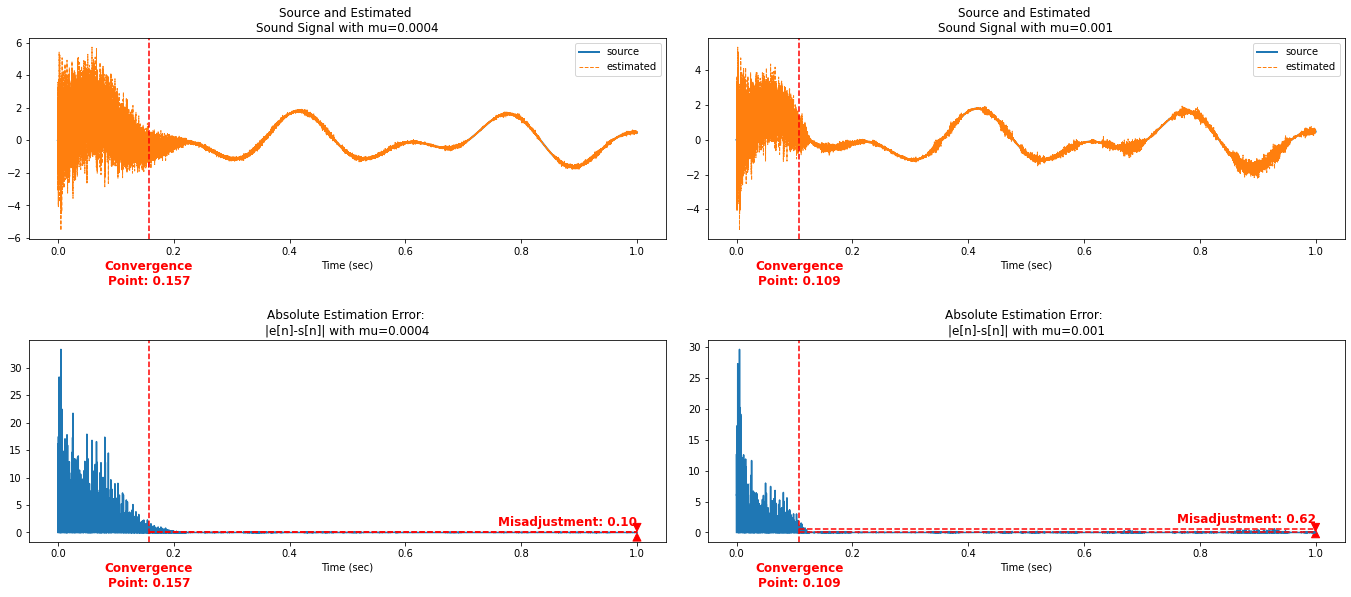

In [27]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.001]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-sign", mus=mus, conv_div=20)

### 4. Leaky LMS

Not Converged!
Not Converged!


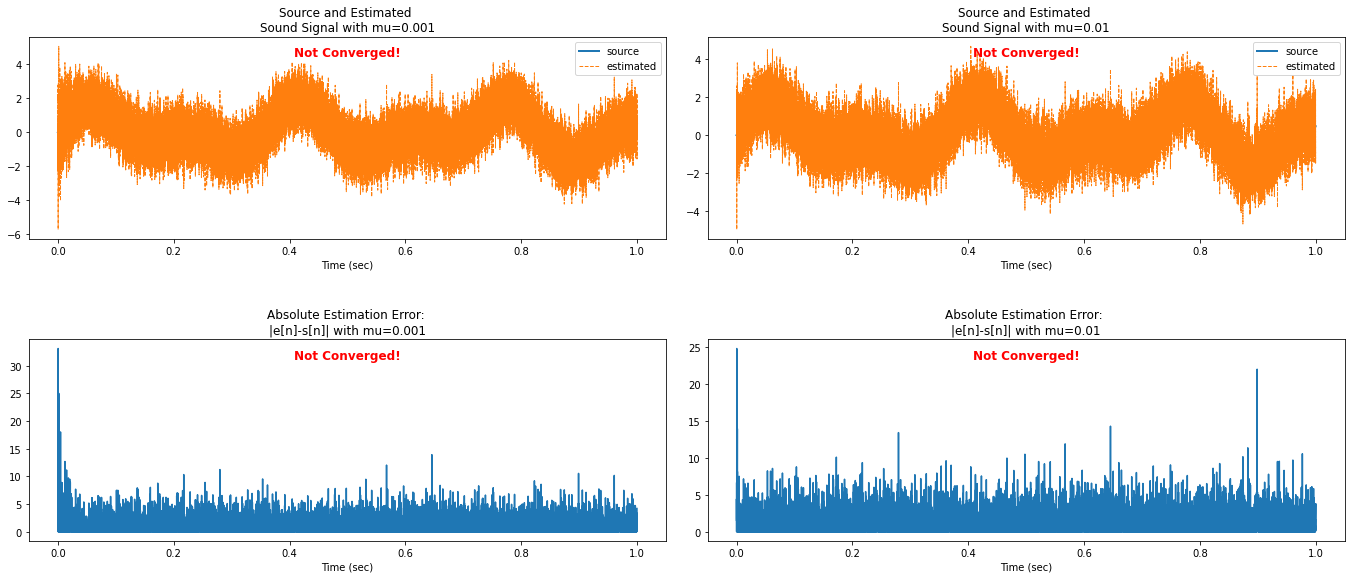

In [28]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="standard", mus=mus, conv_div=20)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 81719.06it/s]


Converged Point: 	 0.016077097505668936 sec
Max Misadjustment: 	 0.3894884930772177


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 82302.66it/s]


Converged Point: 	 0.0033786848072562357 sec
Max Misadjustment: 	 2.7171516980402552


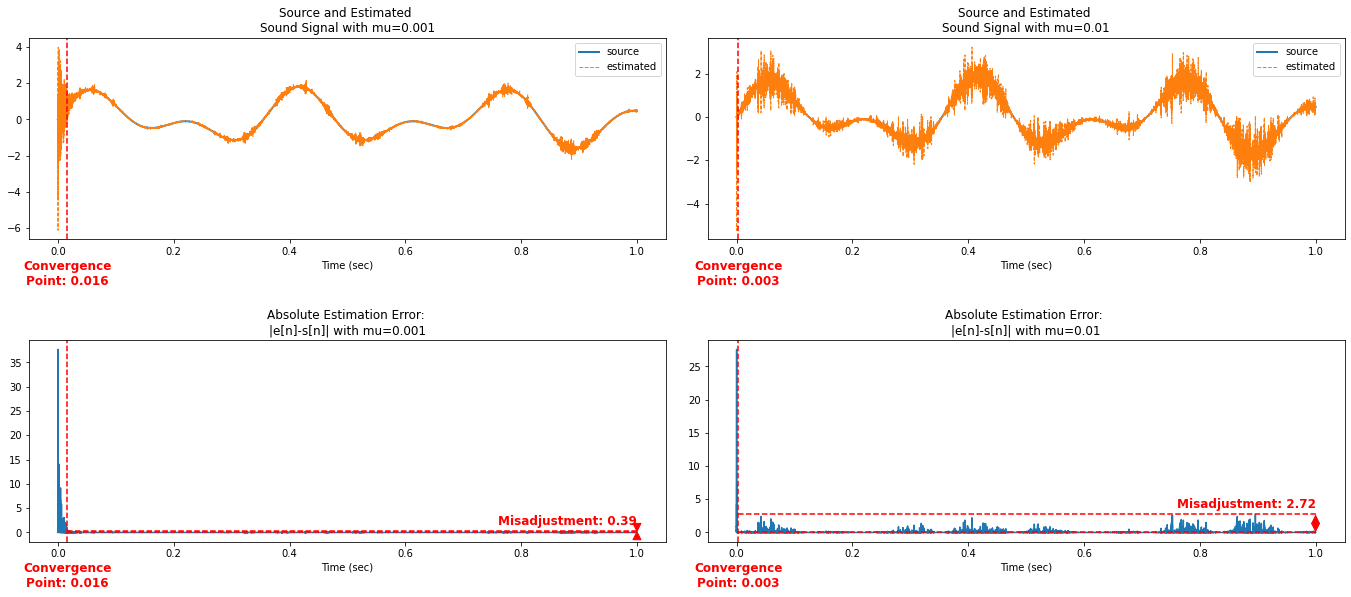

44100

In [37]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
beta = 0.5
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="momentum", beta=beta, mus=mus, conv_div=20)

### 5. RLS

#### First approach

In [ ]:
e = rls(x, d, mu=.999, eps=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.04705215419501134 sec
Max Misadjustment: 	 0.24276530545690964


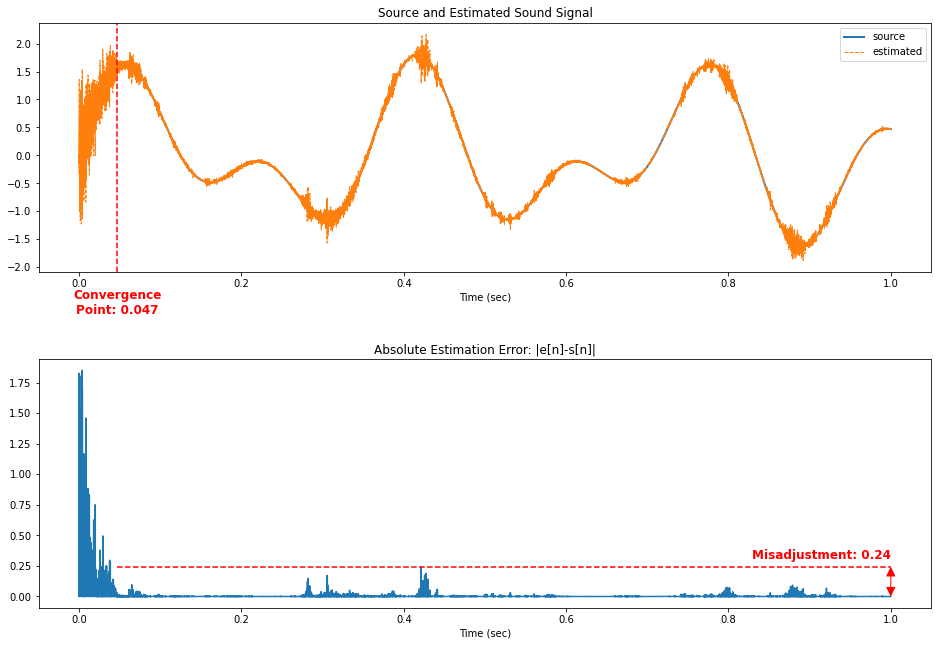

In [28]:
e = rls(x, d, mu=.995, eps=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.10503401360544218 sec
Max Misadjustment: 	 0.06697436683631708


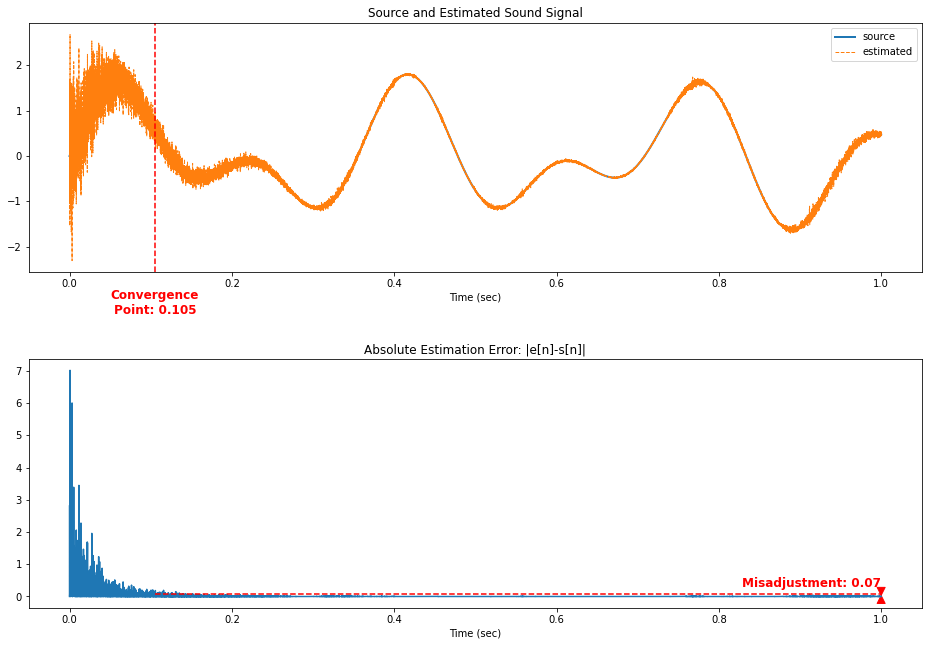

In [9]:
e = rls(x, d, mu=.999, eps=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

#### Comparison K

Ks
Converged Point: 	 0.16607709750566893 sec
Max Misadjustment: 	 0.13756199035204497
Converged Point: 	 0.355124716553288 sec
Max Misadjustment: 	 0.18580171802979445


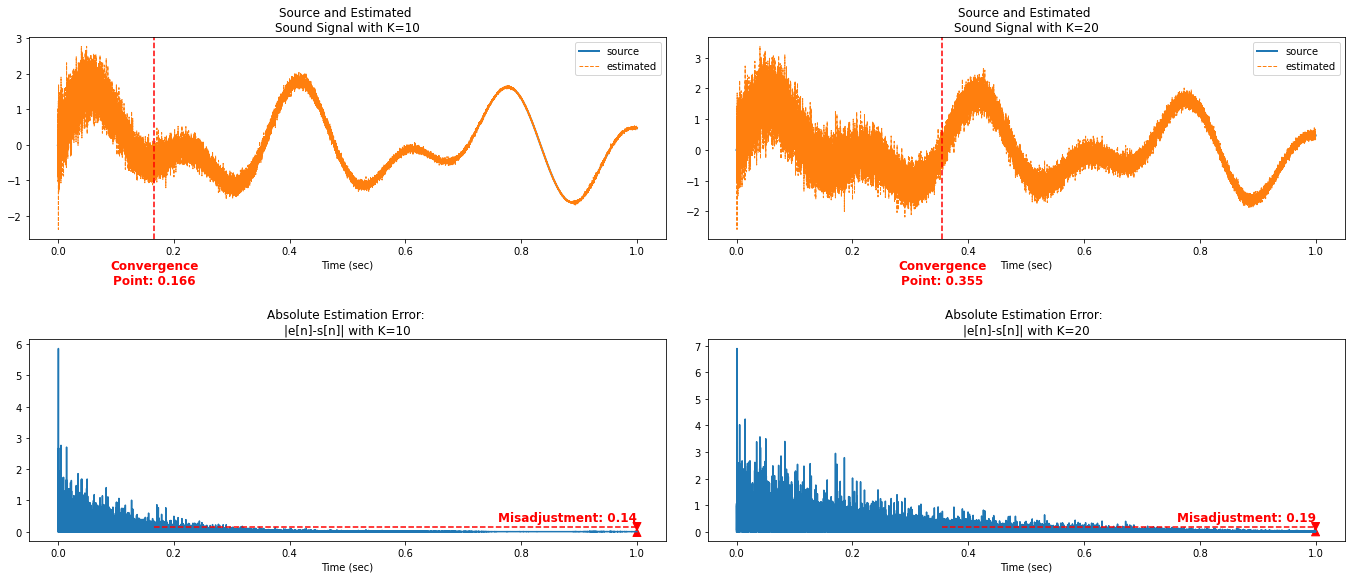

In [118]:
Ks = [10, 20]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, Ks=Ks, rls_bool = True ,conv_div=10, save=True, savedfname="RLSvsKs_1020")

#### Comparison mu

rls_mu
Converged Point: 	 0.09281179138321996 sec
Max Misadjustment: 	 0.05530232589375841
Converged Point: 	 0.025532879818594104 sec
Max Misadjustment: 	 0.19504300610055597


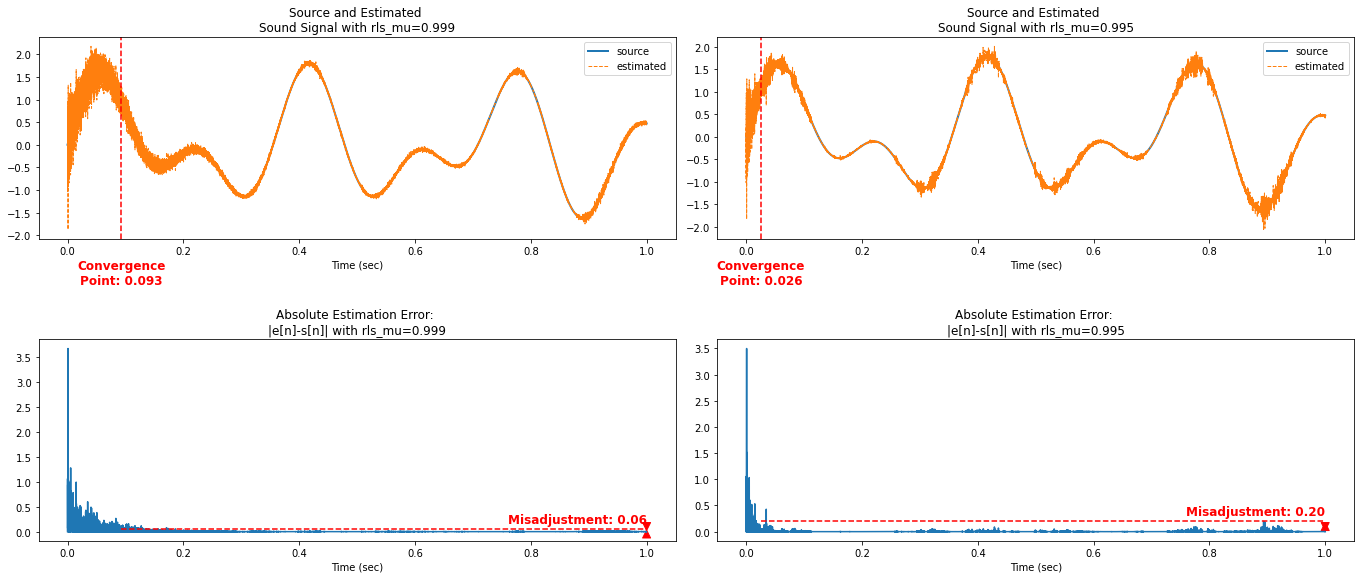

In [125]:
mus = [0.999, 0.995]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, defaultK = 5, rls_bool=True, rls_mu = mus, conv_div=20, save=True, savedfname="RLSvsmusK50")

#### Change in noise at the middle

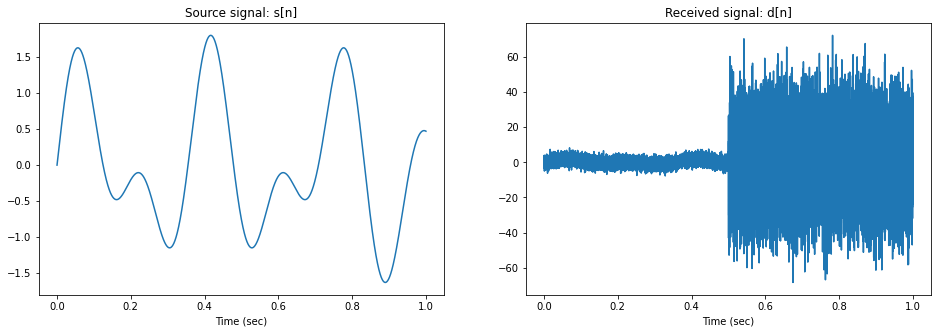

In [126]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]), break_noise=True)

Converged Point: 	 0.023151927437641724 sec
Mean Misadjustment: 	 0.00852828455708828


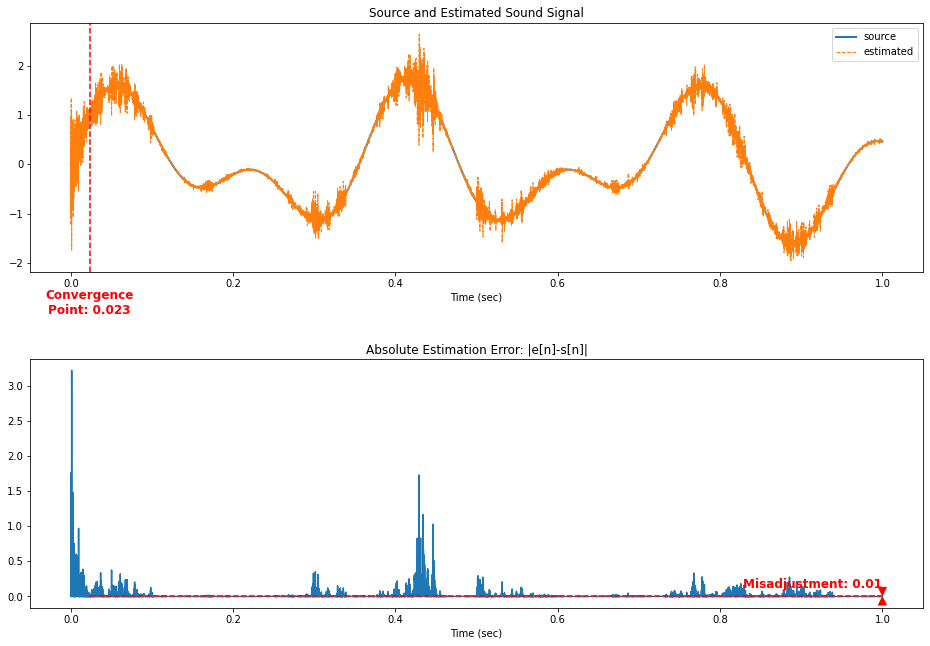

In [133]:
e = rls(x, d, mu=0.98, eps=0.00001,K=10)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="BreakNoiseRLSbigVar", find_mean_adj = True)

Converged Point: 	 0.023038548752834467 sec
Mean Misadjustment: 	 0.8976530274144654


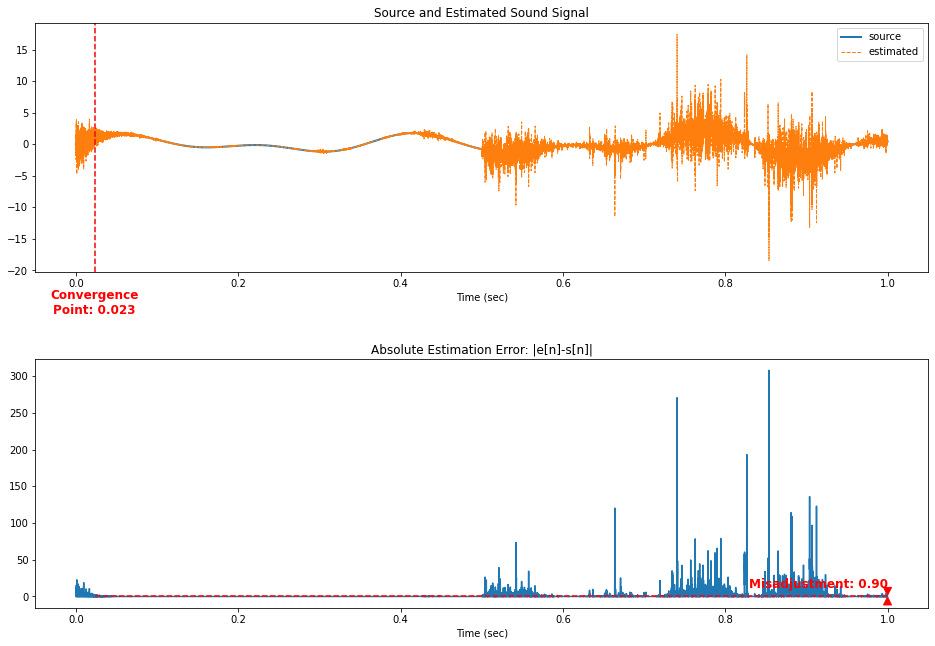

In [134]:
e = sb_lms(x, d, mu=0.001, K=10)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="BreakNoiseLMSbigVar", find_mean_adj=True)

### 6. Block LS

#### First steps

Converged Point: 	 0.49750566893424036 sec
Mean Misadjustment: 	 0.36902156241476064


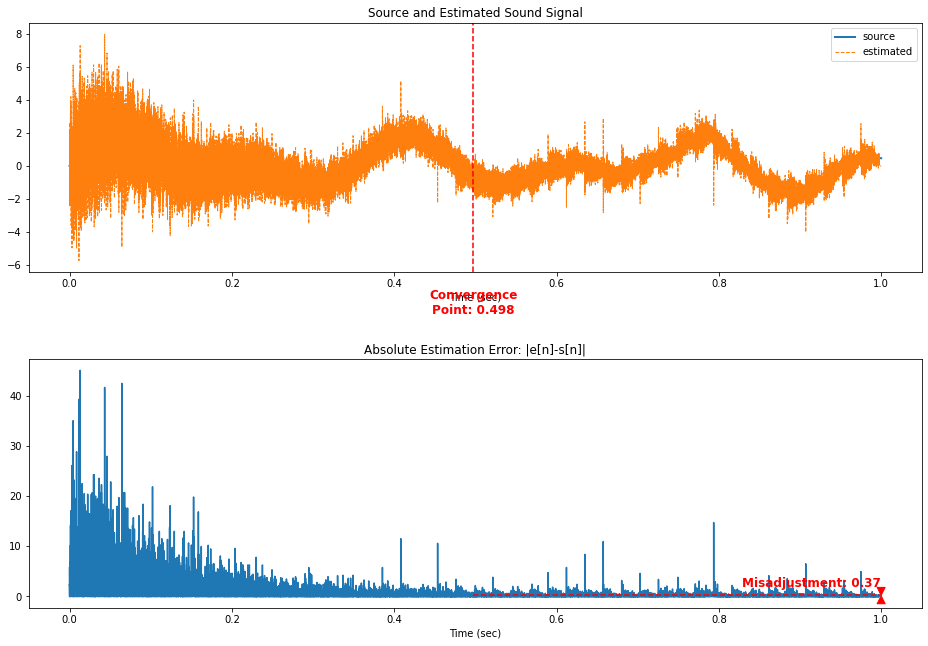

In [97]:
e = fast_block_lms(x, d, mu=1e-4, K=1000)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.11210884353741496 sec
Mean Misadjustment: 	 17.262409503421644


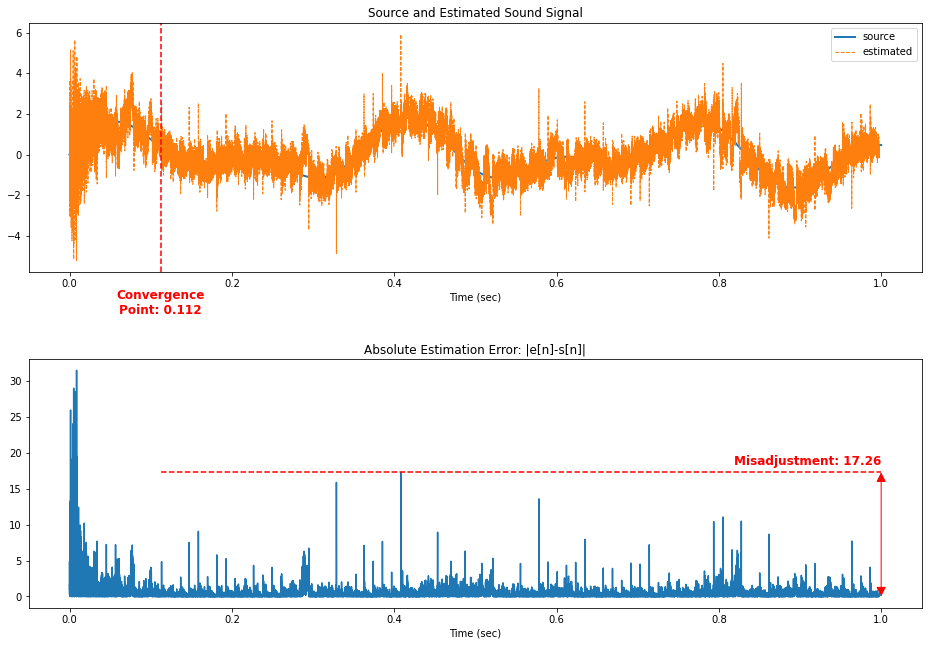

In [99]:
e = fast_block_lms(x, d, mu=0.001, K=500)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.13140589569161 sec
Mean Misadjustment: 	 21.064499895563316


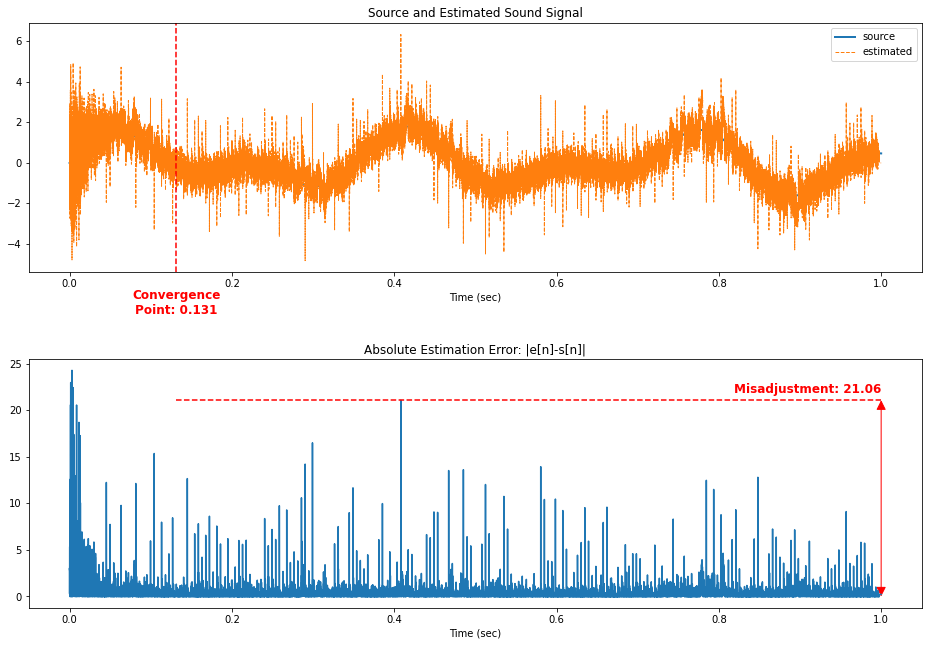

In [100]:
e = fast_block_lms(x, d, mu=0.001, K=200)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

#### Comparison K

In [131]:
Ks = [200]
tab = np.zeros(1000)
for i in range(100):
    tab[i] = denoising_plots_across_params(t, s, x, d, fs=44100, T=1, Ks=Ks, bls_bool = True ,conv_div=10, save=False, plot = False,savedfname="BLSvsKs25003500")

0.02303126984126984

#### Comparison mu

mu
Converged Point: 	 0.04768707482993197 sec
Mean Misadjustment: 	 27.387939069222163
Converged Point: 	 0.10231292517006803 sec
Mean Misadjustment: 	 21.635867544804256
Converged Point: 	 0.3506575963718821 sec
Mean Misadjustment: 	 5.301115428581809


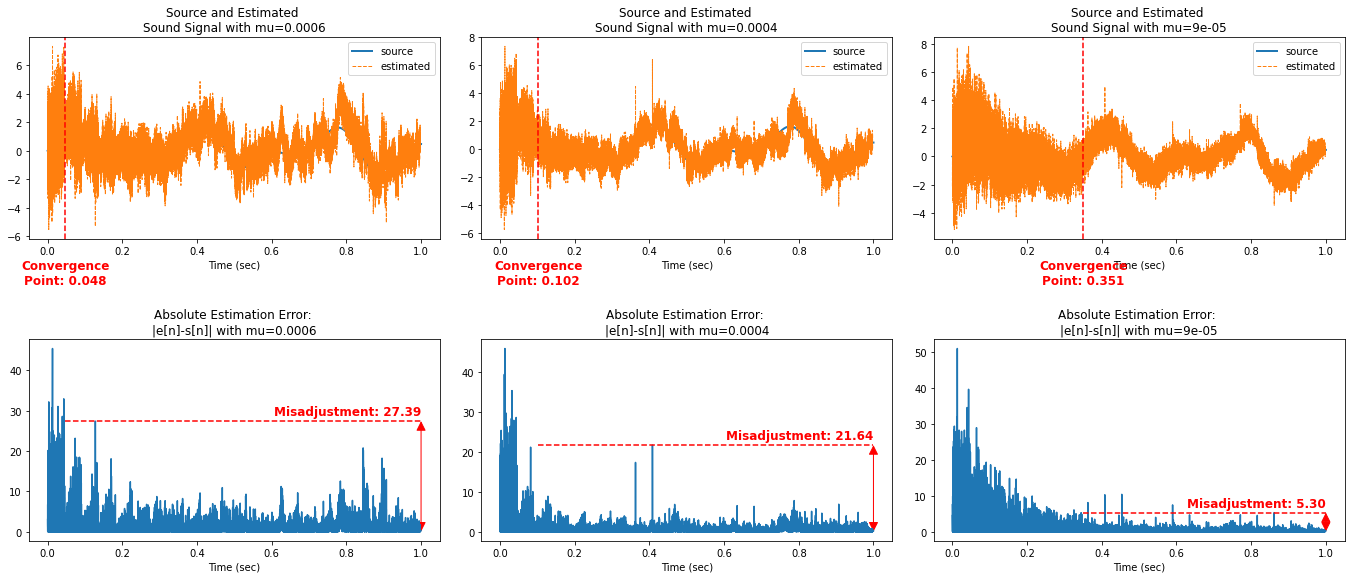

In [146]:
mus = [0.0006, 0.0004, 0.00009]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, defaultK = 2000, bls_bool=True, mus = mus, conv_div=20, save=True, savedfname="BLSvsmuK2000")

#### Change noise in the middle

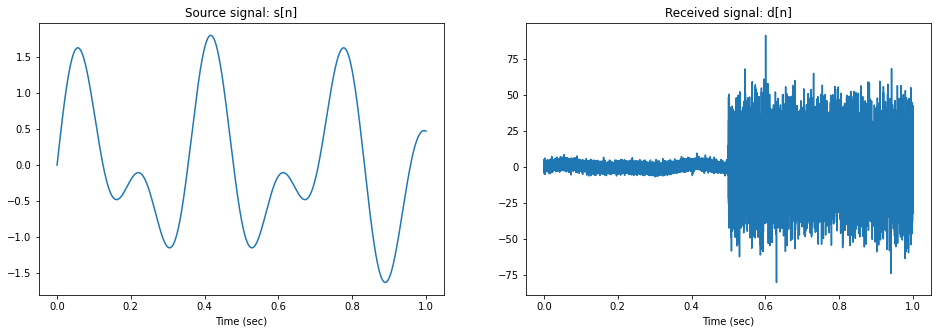

In [147]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]), break_noise=True)

Converged Point: 	 0.0022675736961451248 sec
Max Misadjustment: 	 18.815093173517056


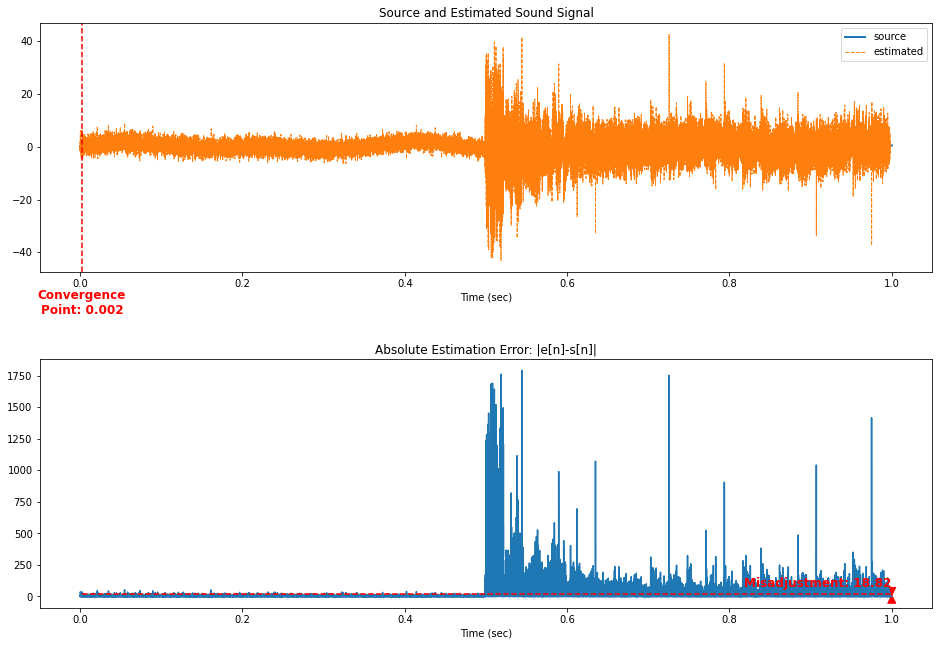

In [162]:
e = fast_block_lms(x, d, mu=0.00001, K=1000)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="BreakNoiseBLS", find_mean_adj = True)

Converged Point: 	 0.023038548752834467 sec
Mean Misadjustment: 	 0.8976530274144654


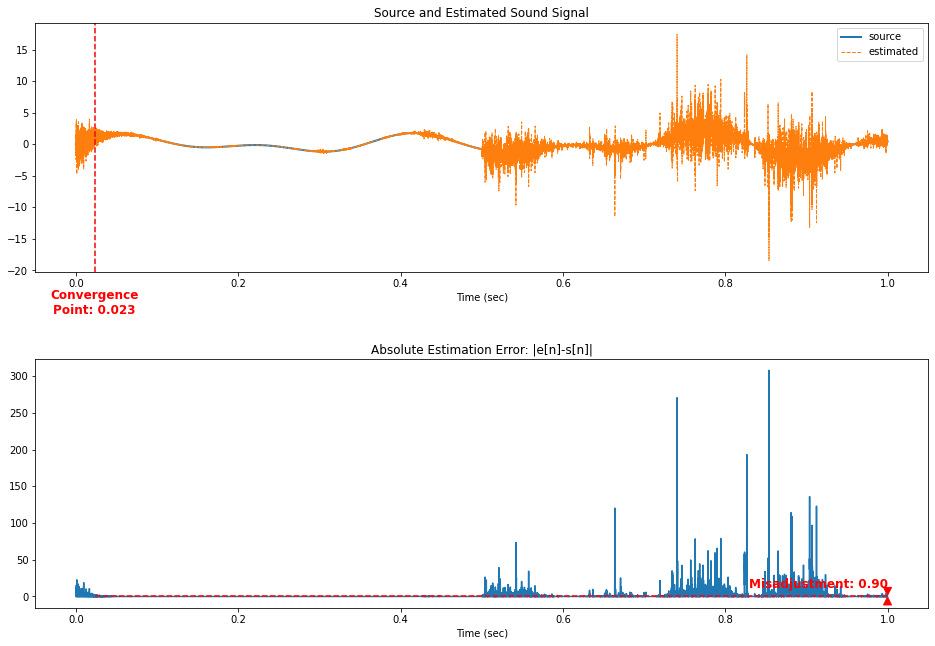

In [134]:
e = sb_lms(x, d, mu=0.001, K=10)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=True, savedfname="BreakNoiseLMSbigVar", find_mean_adj=True)

## Real Data

In [16]:
x, fs = sf.read("../data/talkingNoise.wav", dtype = 'float32')
x = x[:,0]
d, fs = sf.read("../data/bassLineTalkingNoise.wav", dtype = 'float32')
d = d[:,0]

In [17]:
def plot_spectrum():
    fig, axs = plt.subplots(1, 1, figsize=(20, 8))
    axs.grid(True)
    axs.set_xlabel('MSE')
    axs.set_ylabel('sample number')
    axs.semilogy(10)
    axs.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
    return axs

In [22]:
e_rls = rls(x, d, mu=.98, eps=.0001, K=50)

KeyboardInterrupt: 

In [23]:
e_lms = sb_lms(x, d, mu=.01, K=10)

In [216]:
e_bls = fast_block_lms(x, d, mu=0.00001, K=3000)

In [37]:
e_dct = dct_lms(x, d, mu=0.00006, K=50, init_power=2)

In [45]:
e_aff = affine_projection(x, d, mu=0.08, K=20, L=5, gamma=1e-8)

1763 3527


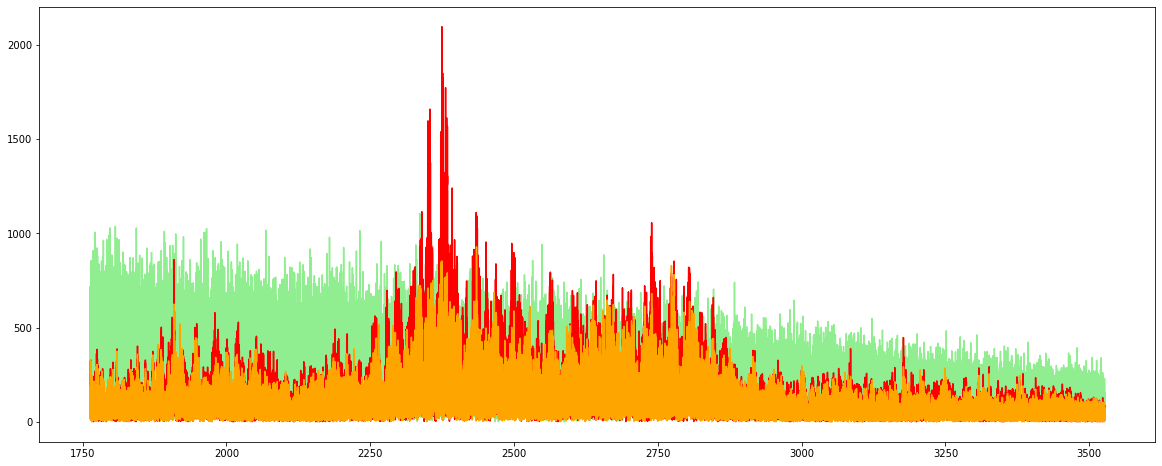

In [50]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
part = int(len(d)/100)
min_p = part*4
max_p = part*8

min_index = int(min_p*fs/len(d))
max_index = int(max_p*fs/len(d))

print(min_index, max_index)
plt.plot(np.linspace(min_index, max_index, max_p-min_p), np.abs(np.fft.fft(e_aff))[min_p:max_p], color='lightgreen')

plt.plot(np.linspace(min_index, max_index, max_p-min_p), np.abs(np.fft.fft(d))[min_p:max_p], color='red')
#plt.plot(np.linspace(min_index, max_index, max_p-min_p), np.abs(np.fft.fft(e_rls))[min_p:max_p], color='blue')
#plt.plot(np.linspace(min_index, max_index, max_p-min_p), np.abs(np.fft.fft(e_dct))[min_p:max_p], color='lightblue')

plt.plot(np.linspace(min_index, max_index, max_p-min_p), np.abs(np.fft.fft(e_lms))[min_p:max_p], color='orange')

plt.savefig("BLS___real_data_mu00001_K3000_mu01_zoom_beginning")